###  Digit Recognition - 2

Here we have a deep learning convolutional network for MNIST dataset.
![](img/model_cnn.png)

In [1]:
#!pip install tensorflow==2.0

In [2]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [3]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils

Let's load the data

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Next we need to load the MNIST dataset and reshape it so that it is suitable for use training a CNN. In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [pixels][width][height].

In the case of RGB, the first dimension pixels would be 3 for the red, green and blue components and it would be like having 3 image inputs for every color image. In the case of MNIST where the pixel values are gray scale, the pixel dimension is set to 1.

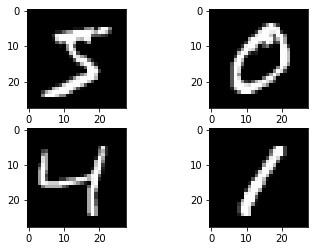

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
# the data, split between train and test sets
# load it for display
(x_train,_) , (_, _) = mnist.load_data()

plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [6]:
# reshape to be [samples][pixels][width][height]

X_train = X_train.reshape(X_train.shape[0], 28,28, 1)
X_test = X_test.reshape(X_test.shape[0], 28,28, 1)
input_shape = (28,28, 1)


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Hot Encode ###
1.What is hot encoding?

The label field is originally a number from 0 to 9, which must be converted into 10 combinations of 0 and 1, corresponding to 10 output neurons respectively.

In [8]:
# one hot encode outputs -- Do not keep running this cell!! 
num_classes=10
y_train = utils.to_categorical(y_train,num_classes)
y_test = utils.to_categorical(y_test,num_classes)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


### The Model ###

Let's define the Model. 


The first hidden layer is a convolutional layer called a **Conv2D**. The layer has 32 feature maps, which with the size of 5×5 and a rectifier activation function (**RELU**). This is the input layer, expecting images with the structure outline above [pixels][width][height].

Next we define a pooling layer that takes the max called **MaxPool2D**. It is configured with a pool size of 2×2.

The next layer is a regularization layer using dropout called **Dropout**. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.

Next is a layer that converts the 2D matrix data to a vector called **Flatten**. It allows the output to be processed by standard fully connected layers.

Next a fully connected layer with 128 neurons and rectifier activation function.

Finally, the output layer has 10 neurons for the 10 classes and a **softmax** activation function to output probability-like predictions for each class.

### Question ###
1. What does Flatten do? Draw a diagram to show how it is connected. 


### Answer
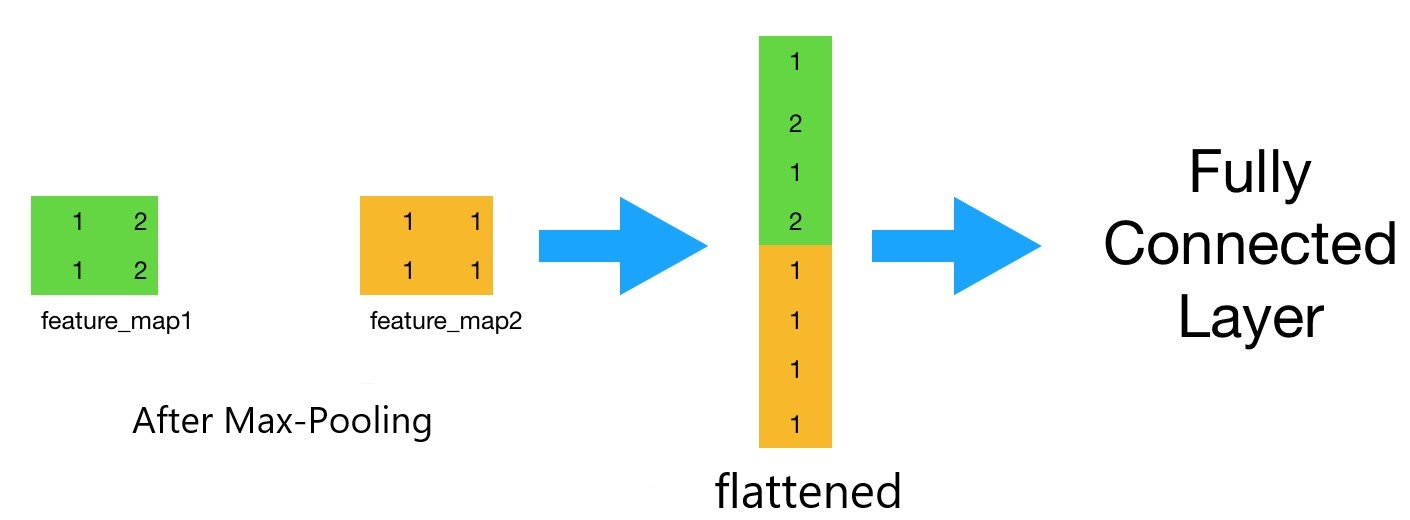Flatten the multi-dimensional input into a one-dimensional output, which is used in the transition from the convolutional layer to the fully connected layer

In [9]:
# create model

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

### The Model Parameters ###

The parameters (learnable weights) in the Conv2D layer is calculated as:

    Conv2D Params = ((Conv2DSize * Conv2DSize)* PrevLayerFilter + Bias))* Conv2DFilters).
    Conv2D Params = ((5 * 5) * 1 + 1) * 32 = 832

    The 2nd learnable params is : (4608 + Bias) * 128 = 589952
    THe 3rd learnable params is : (128 + Bias) * 10 = 1290

The Bias value for all is : 1


### Compiling the Model ###

In [10]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Training the Model ###

In [11]:
history = model.fit(X_train, y_train, epochs=10,batch_size=200, verbose=2, 
                    validation_data=(X_test, y_test))

#model.fit(X_train, y_train, epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 16s - loss: 0.2504 - accuracy: 0.9277 - val_loss: 0.0812 - val_accuracy: 0.9758 - 16s/epoch - 53ms/step
Epoch 2/10
300/300 - 3s - loss: 0.0772 - accuracy: 0.9772 - val_loss: 0.0538 - val_accuracy: 0.9826 - 3s/epoch - 11ms/step
Epoch 3/10
300/300 - 3s - loss: 0.0528 - accuracy: 0.9841 - val_loss: 0.0439 - val_accuracy: 0.9850 - 3s/epoch - 8ms/step
Epoch 4/10
300/300 - 2s - loss: 0.0423 - accuracy: 0.9865 - val_loss: 0.0381 - val_accuracy: 0.9880 - 2s/epoch - 8ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0341 - accuracy: 0.9894 - val_loss: 0.0336 - val_accuracy: 0.9888 - 2s/epoch - 7ms/step
Epoch 6/10
300/300 - 2s - loss: 0.0277 - accuracy: 0.9915 - val_loss: 0.0345 - val_accuracy: 0.9886 - 2s/epoch - 7ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0353 - val_accuracy: 0.9890 - 2s/epoch - 6ms/step
Epoch 8/10
300/300 - 2s - loss: 0.0180 - accuracy: 0.9945 - val_loss: 0.0329 - val_accuracy: 0.9886 - 2s/epoch - 7ms/step
Epoch 9/10
300/300 -

In [12]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print(model.metrics_names[0], scores[0])
print(model.metrics_names[1], scores[1])

313/313 - 1s - loss: 0.0349 - accuracy: 0.9903 - 1s/epoch - 3ms/step
Baseline Error: 0.97%
loss 0.03487487882375717
accuracy 0.9902999997138977


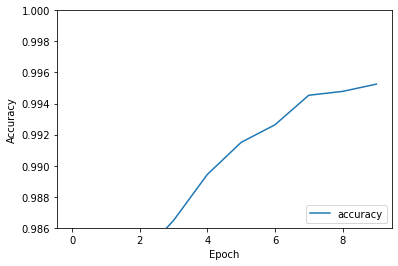

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.986,1.])
plt.legend(loc='lower right')

### Check in the individual predictions


In [14]:
from numpy import argmax, expand_dims
import numpy
#check individual prediction 
y = expand_dims(X_test[0], axis=0)
result=numpy.argmax(model.predict(y))
print(result)
y = expand_dims(X_test[1], axis=0)
result=numpy.argmax(model.predict(y))
print(result)
y = expand_dims(X_test[2], axis=0)
result=numpy.argmax(model.predict(y))
print(result)
y = expand_dims(X_test[3], axis=0)
result=numpy.argmax(model.predict(y))
print(result)

7
2
1
0


### Question ###
1. Compare the results from cnn version with the version without cnn. 

### Answer
without CNN version accuracy is 0.9727   
with CNN version accuracy is 0.9903  
The accuracy of CNN version is higher than without CNN version.
